# 1. Setup

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [153]:
data = pd.read_csv('daily_csv.csv', index_col = 'Date', parse_dates = ['Date'])
data.head()

,Price
Date,
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00


In [154]:
data[data.isnull().any(axis = 1)]

,Price
Date,
2018-01-05,NaN


In [155]:
# Remove the missing value
data.dropna(inplace = True)

# 2. Exploratory Data Analysis

### Full Plot

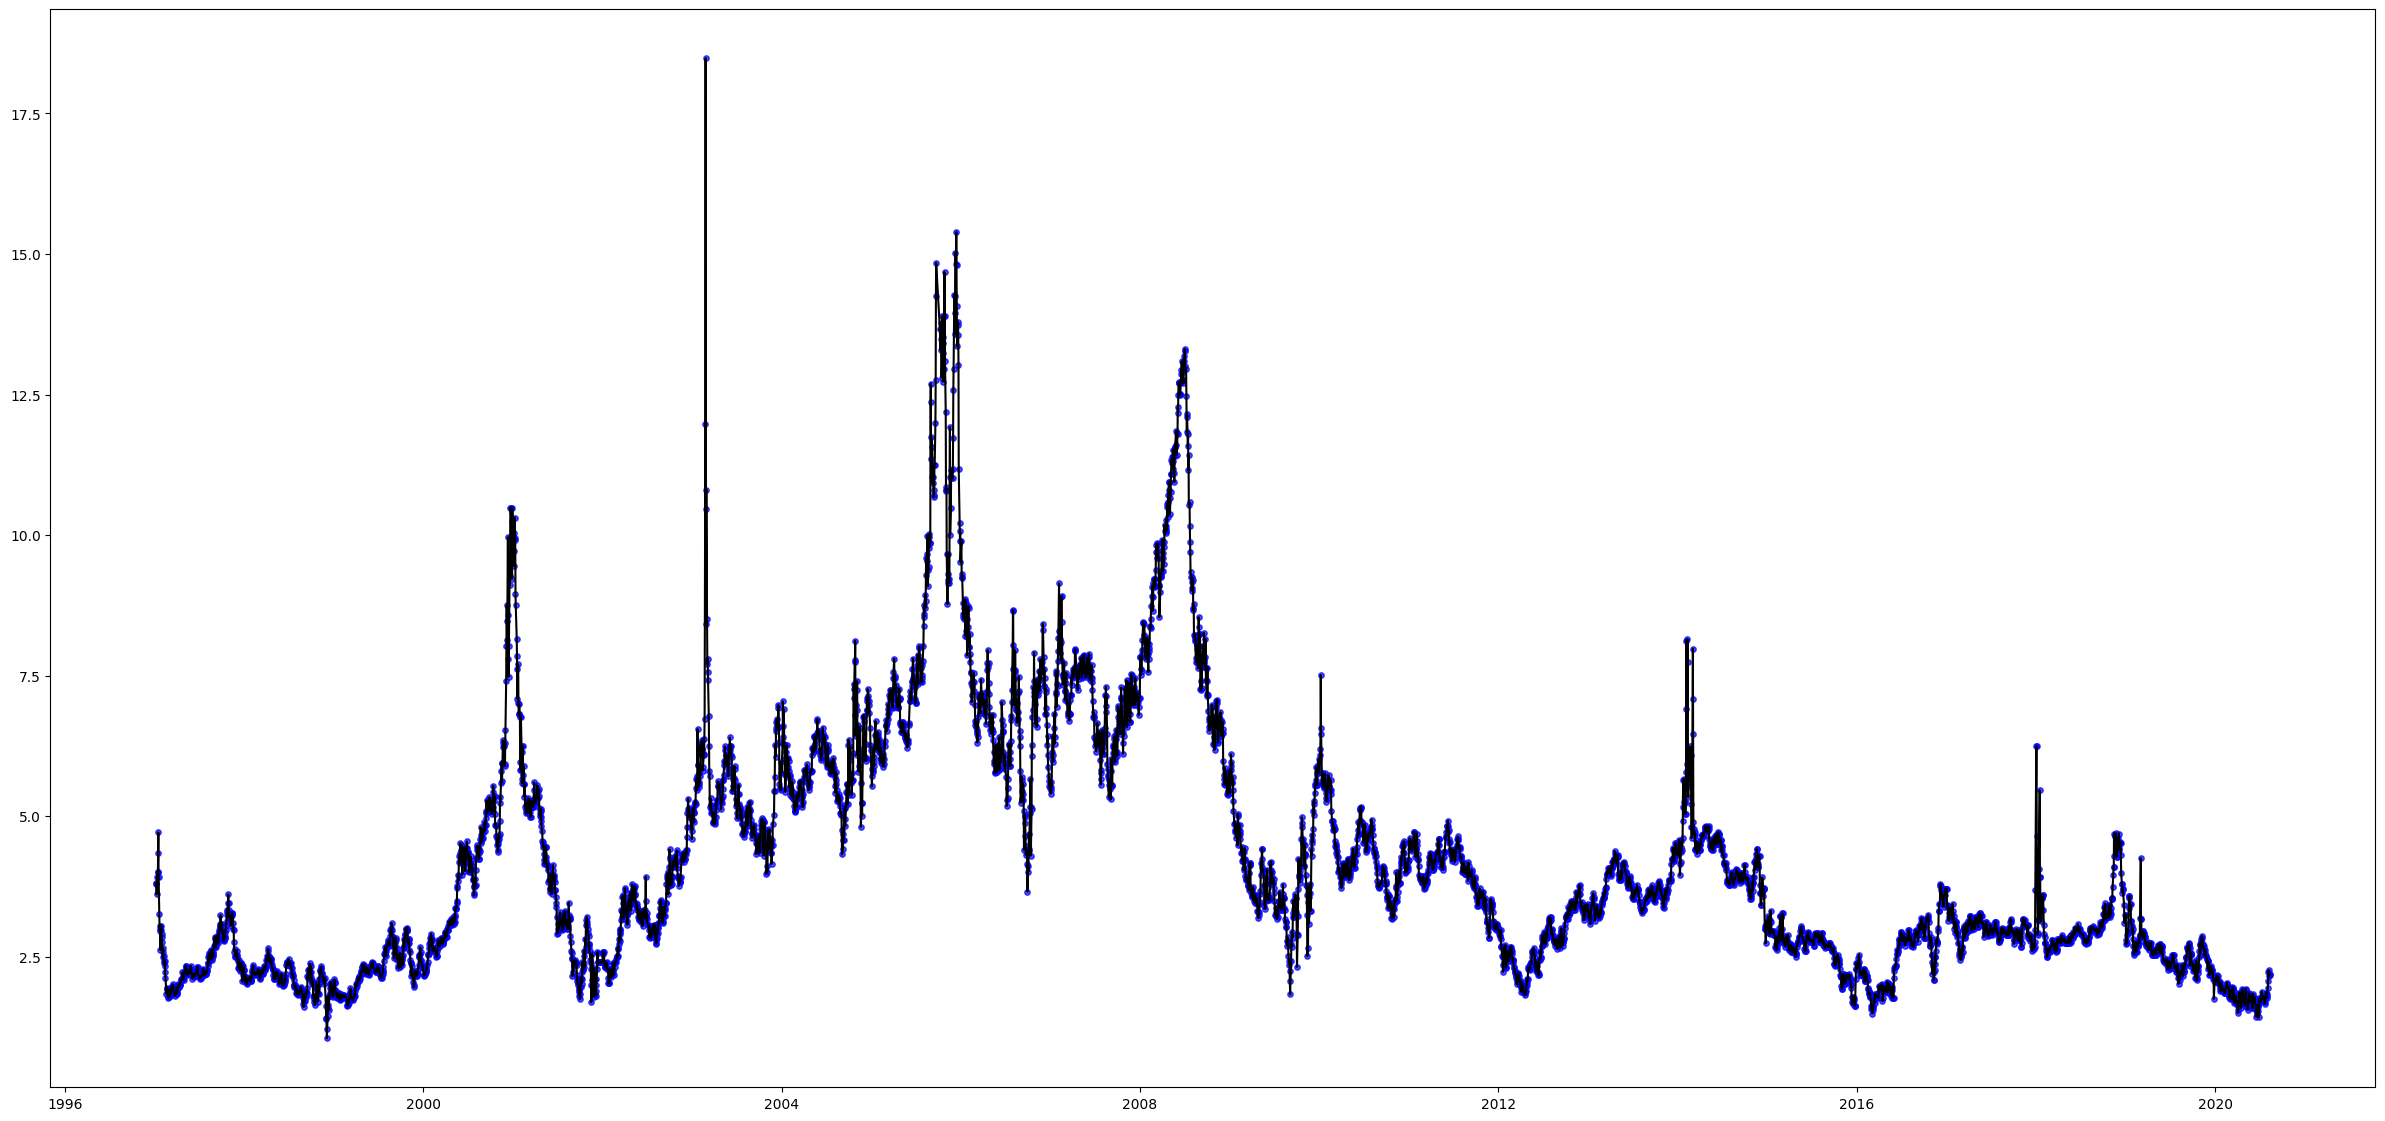

In [156]:
fig, ax = plt.subplots(figsize = [30, 14])
ax.scatter(data.index, data['Price'], s = 15, c = 'blue', alpha = 0.7)
ax.plot(data.index, data['Price'], c = 'black')

### Lag Plot

In [157]:
data['Lag'] = data['Price'].shift(1)
data.head()

,Price,Lag
Date,,
1997-01-07,3.82,NaN
1997-01-08,3.80,3.82
1997-01-09,3.61,3.80
1997-01-10,3.92,3.61
1997-01-13,4.00,3.92


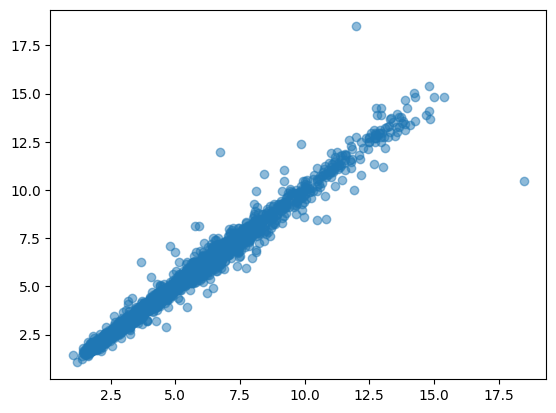

In [158]:
fig, ax = plt.subplots()
ax.scatter(data['Lag'], data['Price'], alpha = 0.5)

The relationship between price and the previous day's price looks extremely linear.

### Linear Regression

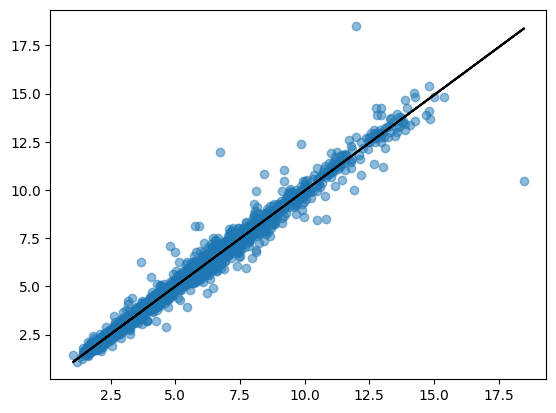

In [159]:
lag_model = LinearRegression()

X = data.loc[:, ['Lag']]
X.dropna(inplace = True)
y = data.loc[:, 'Price']
y, X = y.align(X, join='inner')

lag_model.fit(X, y)

y_pred = pd.Series(lag_model.predict(X), index = X.index)

fig, ax = plt.subplots()
ax.scatter(data['Lag'], data['Price'], alpha = 0.5)
ax.plot(X, y_pred, c = 'black')

Matches up with the previously observed linear relationship.

### Yearly Moving Average

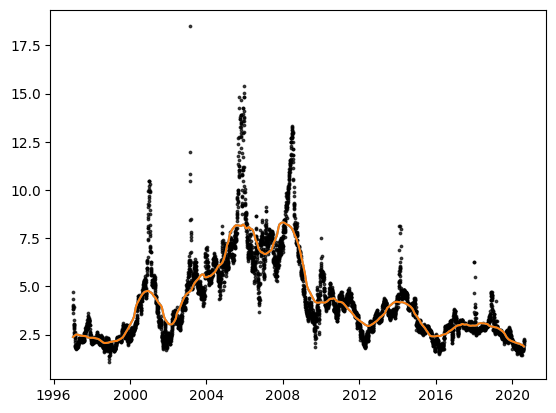

In [160]:
yearly_moving_average = data.rolling(window = 365, center = True, min_periods = 183).mean()
fig, ax = plt.subplots()
ax.scatter(data.index, data['Price'], s = 3, c = 'black', alpha = 0.7)
ax.plot(yearly_moving_average)

There doesn't appear to be a clear increasing or decreasing trend. Besides the period between around 2004-2008, the average price for natural gas has stayed roughly the same.

### Monthly Moving Average

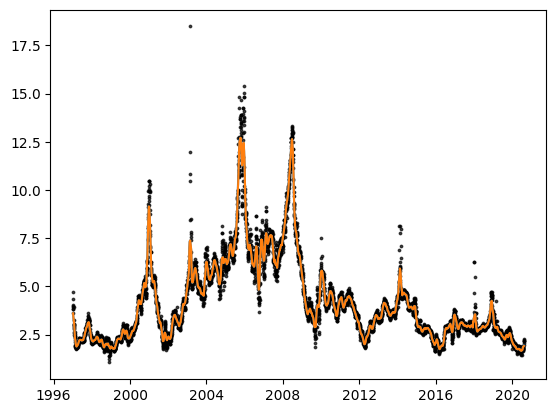

In [161]:
monthly_moving_average = data.rolling(window = 30, center = True, min_periods = 15).mean()
fig, ax = plt.subplots()
ax.scatter(data.index, data['Price'], s = 3, c = 'black', alpha = 0.7)
ax.plot(monthly_moving_average)

There is no clear monthly trend.